Analysis by Larissa Takou-Ayaoh

10/22/2023

## 2023 Spotify Songs Exploratory Data Analysis
### What were the most popular songs, artists and genres in 2023?

![Spotify](https://play-lh.googleusercontent.com/cShys-AmJ93dB0SV8kE6Fl5eSaf4-qMMZdwEDKI5VEmKAXfzOqbiaeAsqqrEBCTdIEs)

**Table of Contents**
* 0. Executive Summary (Key Findings)
* 1. Introduction
* 3. Data Exploration and Cleaning
* 4. Data Analysis and Visualization
* 5. Conclusion

## 0. Executive Summary
### Key Findings

*********
- The most popular Artist was the Weeknd, and he is also the artist for the most popular song 'Blinding lights'. 
'Blinding Lights' was released in 2019, but still maintained a large number of streams.\
- The top 10 most streamed songs from spotify, ranking did not coincide with number of streams. It could also be an indicator that a songs has been on the charts for a longer period.
- There was no strong correlation between numerical factors and the number of streams, however there were medium correlations between factors.
- The majority of songs in the dataset had danceability, valence and energy around 60%. 
- The majority of songs have approximately 120 bpm.
- Songs with the largest streams had a key of C#.

### Objective and Scope
* Collect, clean and analyze the spotify dataset from Kaggle: [2023_Spotify_Songs](https://www.kaggle.com/datasets/nelgiriyewithana/top-spotify-songs-2023)
* Determine variables that contribute to song popularity
* Visualize data to show relationships between variables
* Share findings and insights to help make data-driven business decisions

## 1. Introduction

In this project I am exploring a 2023 Spotify Songs data set to gain insights into which variables have a most significant impact on the popularity of a track.
Below is a list ofthe data set columns and descriptions:

|Columns Names | Description|
| -------------|------------|
|  track_name |Name of the song|
|artist(s)_name| Name of Artist |
|artist_count| Number of Artists features on song|
|released_year| Year song was released|
|released_month| Month song was released|
|released_day| Day song was released|
|in_spotify_playlists| Number of Spotify Playlists song is a part of|
|in_spotify_charts| Presence and Rank of song on Spotify Charts|
|streams | Total number of streams on spotify|
|in_apple_playlists | Number of apple music playlists song is a part of|
|in_apple_charts | Presence and Rank of song on apple charts|
|in_deezer_playlists |Number of Deezer Playlists song is a part of|
|in_deezer_charts | Presence and Rank of song on Deezer charts|
|in_shazam_charts |Rank of song on Shazam charts |
|bpm|Beats per Minutes, measure of song tempo|
|key|Key of the song|
|mode|Mode of song (major or minor)|
|danceability_% |Percentage indicating how suitable the song is for dancing|
|valence_% | Positivity of the song's musical content|
|energy_% | Perceived energy level of the song|
|acousticness_% | Amount of acoustic sound in the song |
|instrumentalness_% |Amount of instrumental content in the song|
|liveness_% | Presence of live performance elements |
|speechiness_% | Amount of spoken words in the song|


Some pertinent questions to answer are the following:

* What is the most popular song of 2023
* Who is the most popular artist of 2023
* What is the Most popular genre of 2023
* What are the most significant factors contributing to a Song's popularity in 2023
* How many albums released in 2023 were in the top 20?

This analysis will be performed entirely with Python and its libraries. Additional interactive visualizations will be created in Tableau.

## 2. Data Exploration and Cleaning

In [1]:
#import pertinent libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
spotify = pd.read_csv("/kaggle/input/top-spotify-songs-2023/spotify-2023.csv", encoding = 'latin')

spotify.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [3]:
spotify.tail()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5
952,Alone,Burna Boy,1,2022,11,4,782,2,96007391,27,...,90,E,Minor,61,32,67,15,0,11,5


In [4]:
spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [5]:
# 'in_shazam_chars' and 'key' contain null values
#return number of null values in columns
spotify.isnull().sum() 


track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

In [6]:
#check if there are duplicate rows
spotify.duplicated().sum()

0

In [7]:
#combine 'year', 'month' and 'day' to one datetime column

spotify["release_date"] = spotify["released_year"].astype(str)+"-" + spotify["released_month"].astype(str)+"-" +spotify["released_day"].astype(str)

pd.to_datetime(spotify["release_date"])

0     2023-07-14
1     2023-03-23
2     2023-06-30
3     2019-08-23
4     2023-05-18
         ...    
948   2022-11-03
949   2022-10-21
950   2022-11-03
951   2022-10-20
952   2022-11-04
Name: release_date, Length: 953, dtype: datetime64[ns]

In [8]:
#streams is object type but we expect it to be numeric
spotify["streams"].sort_values(ascending= False)

#record 574 seems to contain a typo

574    BPM110KeyAModeMajorDanceability53Valence75Ener...
33                                             999748277
625                                            991336132
253                                            988515741
455                                             98709329
                             ...                        
366                                           1022258230
744                                            101780047
515                                            101114984
500                                           1007612429
301                                            100409613
Name: streams, Length: 953, dtype: object

In [9]:
#search song on the internet to find number of streams and assign it to row 574, column 8/'streams'
spotify.iloc[574, 8] = '210581761'
#convert 'streams' column to integer
spotify['streams'] =  spotify['streams'].astype(int)

spotify["streams"].sort_values(ascending = False)

55     3703895074
179    3562543890
86     2887241814
620    2864791672
41     2808096550
          ...    
68       14780425
142      11956641
144      11599388
393       1365184
123          2762
Name: streams, Length: 953, dtype: int64

## 3. Data Analysis and Visualization

### What was the Most Popular Song of 2023?

In [10]:
spotify['artist(s)_name'].unique().size

#There are 953 song entries and 645 artists,it shows that some artists had multiple records that were popular in 2023

645

In [11]:
spotify_df = spotify.copy()
top_10_songs = spotify_df.sort_values(by = "streams", ascending = False).iloc[:10,:]

top_10_songs

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,release_date
55,Blinding Lights,The Weeknd,1,2019,11,29,43899,69,3703895074,672,...,C#,Major,50,38,80,0,0,9,7,2019-11-29
179,Shape of You,Ed Sheeran,1,2017,1,6,32181,10,3562543890,33,...,C#,Minor,83,93,65,58,0,9,8,2017-1-6
86,Someone You Loved,Lewis Capaldi,1,2018,11,8,17836,53,2887241814,440,...,C#,Major,50,45,41,75,0,11,3,2018-11-8
620,Dance Monkey,Tones and I,1,2019,5,10,24529,0,2864791672,533,...,F#,Minor,82,54,59,69,0,18,10,2019-5-10
41,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",2,2018,10,9,24094,78,2808096550,372,...,D,Major,76,91,50,54,0,7,5,2018-10-9
162,One Dance,"Drake, WizKid, Kyla",3,2016,4,4,43257,24,2713922350,433,...,C#,Major,77,36,63,1,0,36,5,2016-4-4
84,STAY (with Justin Bieber),"Justin Bieber, The Kid Laroi",2,2021,7,9,17050,36,2665343922,492,...,C#,Major,59,48,76,4,0,10,5,2021-7-9
140,Believer,Imagine Dragons,1,2017,1,31,18986,23,2594040133,250,...,A#,Minor,77,74,78,4,0,23,11,2017-1-31
725,Closer,"The Chainsmokers, Halsey",2,2016,5,31,28032,0,2591224264,315,...,G#,Major,75,64,52,41,0,11,3,2016-5-31
48,Starboy,"The Weeknd, Daft Punk",2,2016,9,21,29536,79,2565529693,281,...,G,Major,68,49,59,16,0,13,28,2016-9-21


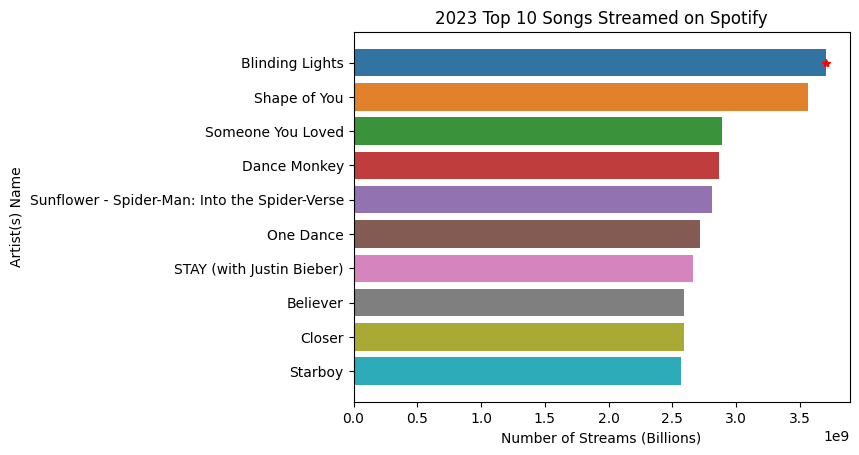

In [12]:
t_a = sns.barplot(data = top_10_songs, y ="track_name", x= "streams")
plt.title("2023 Top 10 Songs Streamed on Spotify")
plt.xlabel("Number of Streams (Billions)")
plt.ylabel("Artist(s) Name")
t_a.plot(top_10_songs['streams'].max(), top_10_songs['artist(s)_name'][top_10_songs['streams']==top_10_songs['streams'].max()], marker ="*", color = 'red')


* The most streamed song was 'Blinding Lights' with 3.7 Billion Streams. The bar plot also shows that only the top two songs had over 3 Billion Streams.

### Who was the most popular Artist of 2023?

In [13]:
popular_artists = spotify_df.groupby('artist(s)_name')['streams'].sum()

top_10_artists = popular_artists.sort_values(ascending = False).nlargest(10)

top_10_artists

artist(s)_name
The Weeknd         14185552870
Taylor Swift       14053658300
Ed Sheeran         13908947204
Harry Styles       11608645649
Bad Bunny           9997799607
Olivia Rodrigo      7442148916
Eminem              6183805596
Bruno Mars          5846920599
Arctic Monkeys      5569806731
Imagine Dragons     5272484650
Name: streams, dtype: int64

In [14]:
print(top_10_artists.idxmax())
top_10_artists.max()
popular_artists.max()

The Weeknd


14185552870

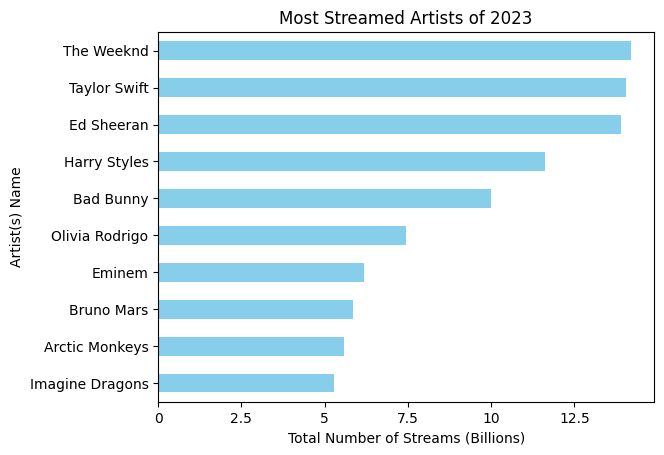

In [15]:
top_a = top_10_artists.plot.barh(color ='skyblue')
plt.title("Most Streamed Artists of 2023")
plt.xlabel("Total Number of Streams (Billions)")
plt.ylabel('Artist(s) Name')
x_label_range = np.arange(0, popular_artists.max(),2500000000 )
plt.xticks(x_label_range, labels = [0, 2.5,5,7.5,10, 12.5])
top_a.invert_yaxis()

* The Weeknd holds first place as the most streamed artists, and most streamed song with 'Blinding Lights'

### How did the Top 10 Artists and Songs perform on Different platforms?

In [16]:
#retrieve top 10 songs chart rank on each platform
platforms = ["spotify", "apple", "deezer", "shazam"]
spotify_charts, apple_charts, deezer_charts, shazam_charts = [top_10_songs[['artist(s)_name', f'in_{p}_charts', 'streams']].sort_values(f'in_{p}_charts') for p in platforms]


In [17]:
#remove chart ranks of 0 (chart scale starts from 1(best))

spotify_charts['in_spotify_charts'].replace(0, np.NaN, inplace = True)
apple_charts['in_apple_charts'].replace(0, np.NaN, inplace = True)
deezer_charts['in_deezer_charts'].replace(0, np.NaN, inplace = True)
shazam_charts['in_shazam_charts'].replace(np.NaN, 0, inplace = True)

shazam_charts['in_shazam_charts'] = shazam_charts['in_shazam_charts'].astype(int)
shazam_charts['in_shazam_charts'].replace(0, np.NaN,inplace = True)

shazam_charts

,artist(s)_name,in_shazam_charts,streams
179,Ed Sheeran,NaN,3562543890
84,"Justin Bieber, The Kid Laroi",NaN,2665343922
48,"The Weeknd, Daft Punk",140.0,2565529693
162,"Drake, WizKid, Kyla",26.0,2713922350
140,Imagine Dragons,31.0,2594040133
725,"The Chainsmokers, Halsey",44.0,2591224264
41,"Post Malone, Swae Lee",69.0,2808096550
55,The Weeknd,NaN,3703895074
86,Lewis Capaldi,NaN,2887241814
620,Tones and I,NaN,2864791672


/tmp/ipykernel_32/93549767.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(spotify_charts['artist(s)_name'], rotation=45, ha='right', minor=False)
/tmp/ipykernel_32/93549767.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(apple_charts['artist(s)_name'], rotation=45, ha='right', minor=False)
/tmp/ipykernel_32/93549767.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[2].set_xticklabels(deezer_charts['artist(s)_name'], rotation=45, ha='right', minor=False)
/tmp/ipykernel_32/93549767.py:42: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[3].set_xticklabels(shazam_charts['artist(s)_name'], rotation=45, ha='right', minor=False)


Text(0.5, 0.98, 'Artist Streams and Ranks on Different Platforms')

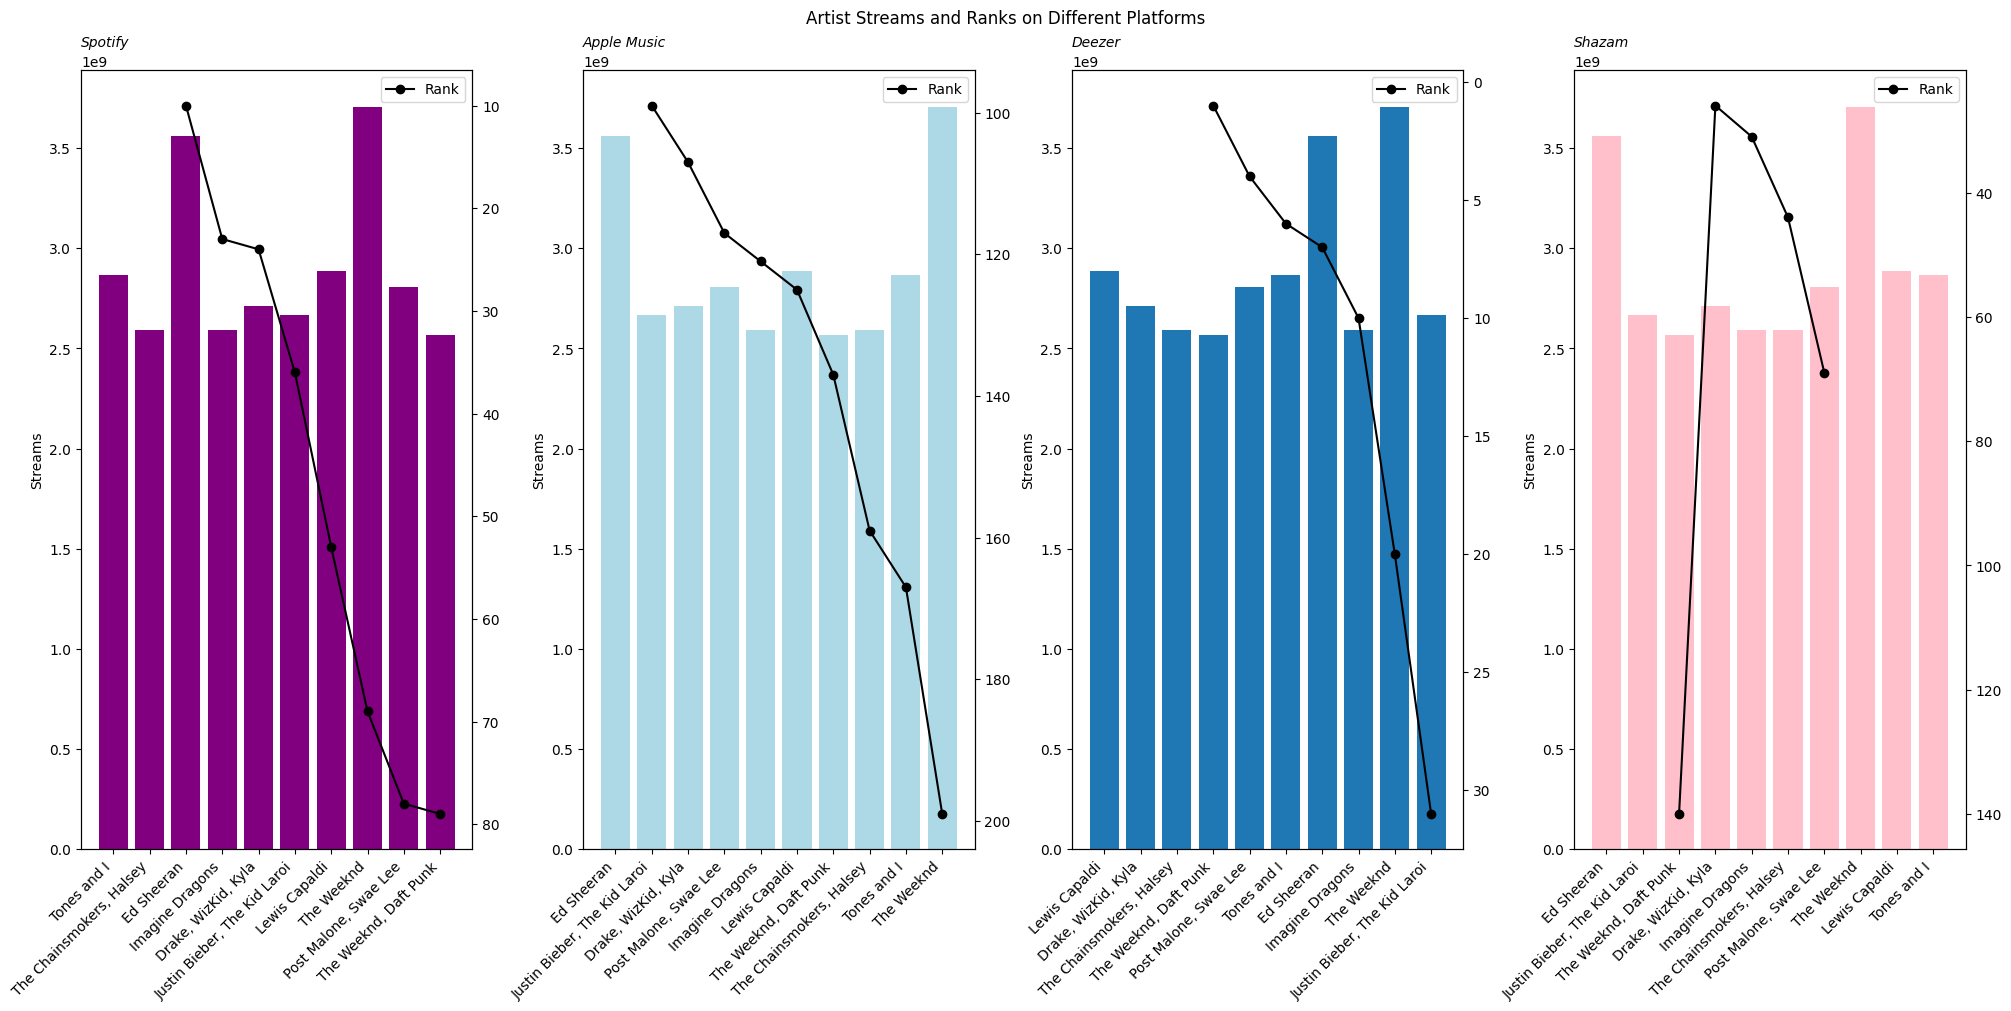

In [18]:
from matplotlib import cm, colors

fig, axes = plt.subplots(1, 4, figsize = (20,10), layout = 'constrained')

#first subplot
#bar chat
axes[0].bar(spotify_charts['artist(s)_name'], spotify_charts['streams'], color= 'purple', label ='Streams')
axes[0].set_title('Spotify', loc='left', fontstyle='oblique', fontsize='medium')
axes[0].set_xticklabels(spotify_charts['artist(s)_name'], rotation=45, ha='right', minor=False)
axes[0].set_ylabel('Streams')

ax0 = axes[0].twinx()
ax0.plot(spotify_charts['artist(s)_name'], spotify_charts['in_spotify_charts'], marker = "o", label = 'Rank', color = 'black')
ax0.invert_yaxis()
ax0.legend()


axes[1].bar(apple_charts['artist(s)_name'],apple_charts['streams'], color = 'lightblue')
axes[1].set_title('Apple Music', loc='left', fontstyle='oblique', fontsize='medium')
axes[1].set_xticklabels(apple_charts['artist(s)_name'], rotation=45, ha='right', minor=False)
axes[1].set_ylabel('Streams')

ax1 = axes[1].twinx()
ax1.plot(apple_charts['artist(s)_name'], apple_charts['in_apple_charts'], marker = "o",label = 'Rank', color = 'black')
ax1.invert_yaxis()
ax1.legend()


axes[2].bar(deezer_charts['artist(s)_name'],deezer_charts['streams'])
axes[2].set_title('Deezer', loc='left', fontstyle='oblique', fontsize='medium')
axes[2].set_xticklabels(deezer_charts['artist(s)_name'], rotation=45, ha='right', minor=False)
axes[2].set_ylabel('Streams')

ax2 = axes[2].twinx()
ax2.plot(deezer_charts['artist(s)_name'], deezer_charts['in_deezer_charts'], marker = 'o', label = 'Rank', color = 'black')
ax2.invert_yaxis()
ax2.legend()


axes[3].bar(shazam_charts['artist(s)_name'],shazam_charts['streams'], color = 'pink')
axes[3].set_title('Shazam', loc='left', fontstyle='oblique', fontsize='medium')
axes[3].set_xticklabels(shazam_charts['artist(s)_name'], rotation=45, ha='right', minor=False)
axes[3].set_ylabel('Streams')

ax3 = axes[3].twinx()
ax3.plot(shazam_charts['artist(s)_name'], shazam_charts['in_shazam_charts'], marker = 'o',label = 'Rank', color= 'black')
ax3.invert_yaxis()
ax3.legend()

fig.suptitle("Artist Streams and Ranks on Different Platforms")##combine all ranks into one column



**Note that there is some missing data in the ranks of the songs, our assumption is that they were not present on the charts. Therefore, song chart rank does not determine the number of streams within a year, and vice-versa.**

### What Were the Most Significant Factors that Impacted a Song's Popularity in 2023?

In [19]:
numerical_factors = ["streams","bpm","danceability_%","valence_%","energy_%","acousticness_%","instrumentalness_%","liveness_%","speechiness_%"]
spotify_df_factors = spotify_df.sort_values(by='streams', ascending = False)[numerical_factors]

spotify_df_factors.iloc[:10, :]

,streams,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
55,3703895074,171,50,38,80,0,0,9,7
179,3562543890,96,83,93,65,58,0,9,8
86,2887241814,110,50,45,41,75,0,11,3
620,2864791672,98,82,54,59,69,0,18,10
41,2808096550,90,76,91,50,54,0,7,5
162,2713922350,104,77,36,63,1,0,36,5
84,2665343922,170,59,48,76,4,0,10,5
140,2594040133,125,77,74,78,4,0,23,11
725,2591224264,95,75,64,52,41,0,11,3
48,2565529693,186,68,49,59,16,0,13,28


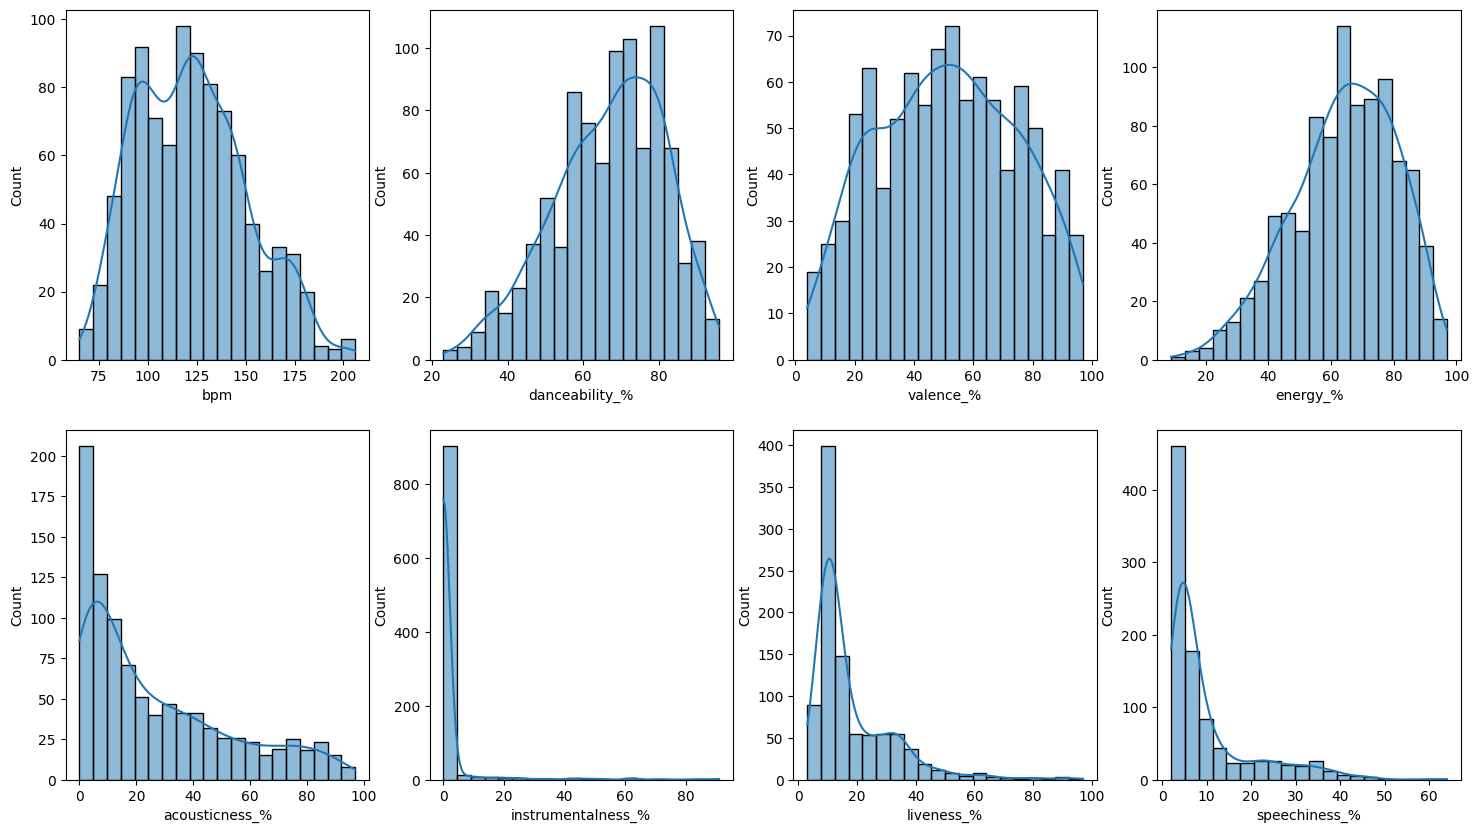

In [20]:
#numerical factors distribution plots
numerical_factors = numerical_factors[1:]
fig, axesf = plt.subplots(2,4,figsize= (18,10))

for i in range(0,2):
    for j in range(0,4):
        if i == 0:
            sns.histplot(spotify_df[numerical_factors[j]], kde = True, ax = axesf[i,j], bins = 20)
        elif i == 1:
            sns.histplot(spotify_df[numerical_factors[4+j]], kde = True, ax = axesf[i,j], bins = 20)        
        
                                
        

### Top 10 Songs, Factors Distribution

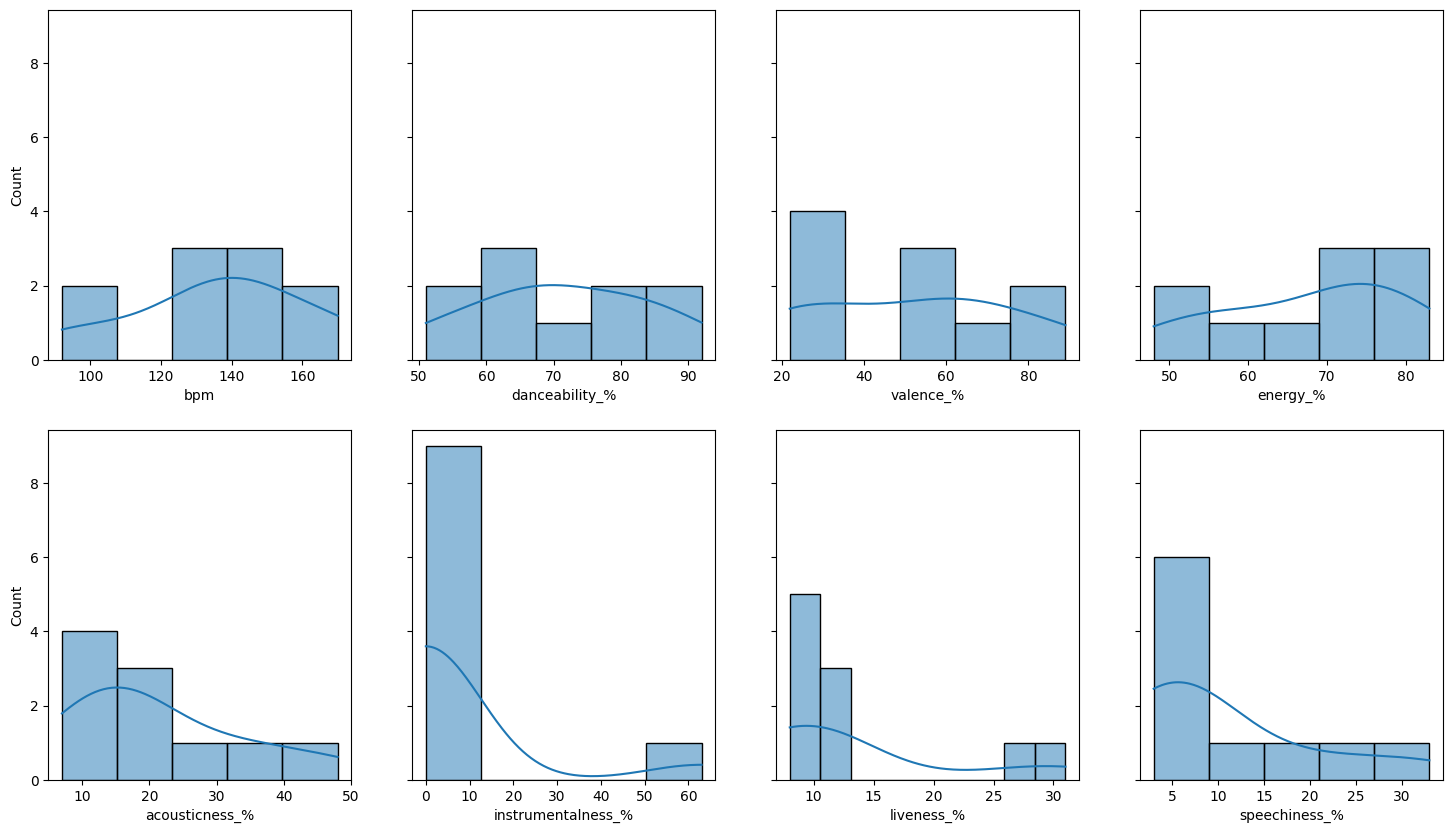

In [21]:
spotify_df_10 = spotify_df.iloc[:10,:]
fig, axesf10 = plt.subplots(2,4,figsize= (18,10), sharey = True)
for i in range(0,2):
    for j in range(0,4):
        if i == 0:
            sns.histplot(spotify_df_10[numerical_factors[j]], kde = True, ax = axesf10[i,j] )
        elif i == 1:
            sns.histplot(spotify_df_10[numerical_factors[4+j]], kde = True, ax = axesf10[i,j])        
        

In [22]:
#correlation between number of streams and each factor
spotify_df_factors.corr()["streams"]

streams               1.000000
bpm                  -0.002186
danceability_%       -0.104853
valence_%            -0.041368
energy_%             -0.026207
acousticness_%       -0.004048
instrumentalness_%   -0.044789
liveness_%           -0.048280
speechiness_%        -0.111881
Name: streams, dtype: float64

The correlation coefficients between number of streams and other columns are not as strong as expected. The highest is -0.111  with 'speechiness', however this shows that there were only weak correlations. 
If we were to perform a multi-linear regression, we may come up with an appropriate model with predictors that can effectively predict the success of a song (number of streams)

In [23]:
numerical_factors_corr = spotify_df_factors.corr()
numerical_factors_corr

,streams,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
streams,1.000000,-0.002186,-0.104853,-0.041368,-0.026207,-0.004048,-0.044789,-0.048280,-0.111881
bpm,-0.002186,1.000000,-0.147095,0.041195,0.025794,-0.017694,-0.001195,-0.000761,0.039260
danceability_%,-0.104853,-0.147095,1.000000,0.408451,0.198095,-0.236165,-0.089138,-0.077538,0.184977
valence_%,-0.041368,0.041195,0.408451,1.000000,0.357612,-0.081907,-0.132890,0.021278,0.041081
energy_%,-0.026207,0.025794,0.198095,0.357612,1.000000,-0.577344,-0.038547,0.117302,-0.004846
acousticness_%,-0.004048,-0.017694,-0.236165,-0.081907,-0.577344,1.000000,0.042796,-0.050142,-0.022501
instrumentalness_%,-0.044789,-0.001195,-0.089138,-0.132890,-0.038547,0.042796,1.000000,-0.045967,-0.083396
liveness_%,-0.048280,-0.000761,-0.077538,0.021278,0.117302,-0.050142,-0.045967,1.000000,-0.022525
speechiness_%,-0.111881,0.039260,0.184977,0.041081,-0.004846,-0.022501,-0.083396,-0.022525,1.000000


Text(0.5, 1.0, 'Numerical Factors Correlations')

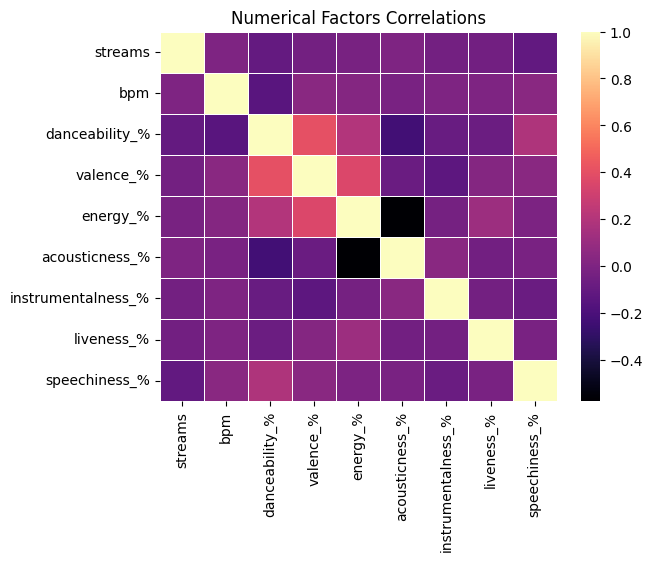

In [24]:
sns.heatmap(numerical_factors_corr, cmap = 'magma', linewidth = 0.5)
plt.grid(visible = False)
plt.xticks()
plt.title('Numerical Factors Correlations')

### Numerical Factors Relationship Scatter Plots

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


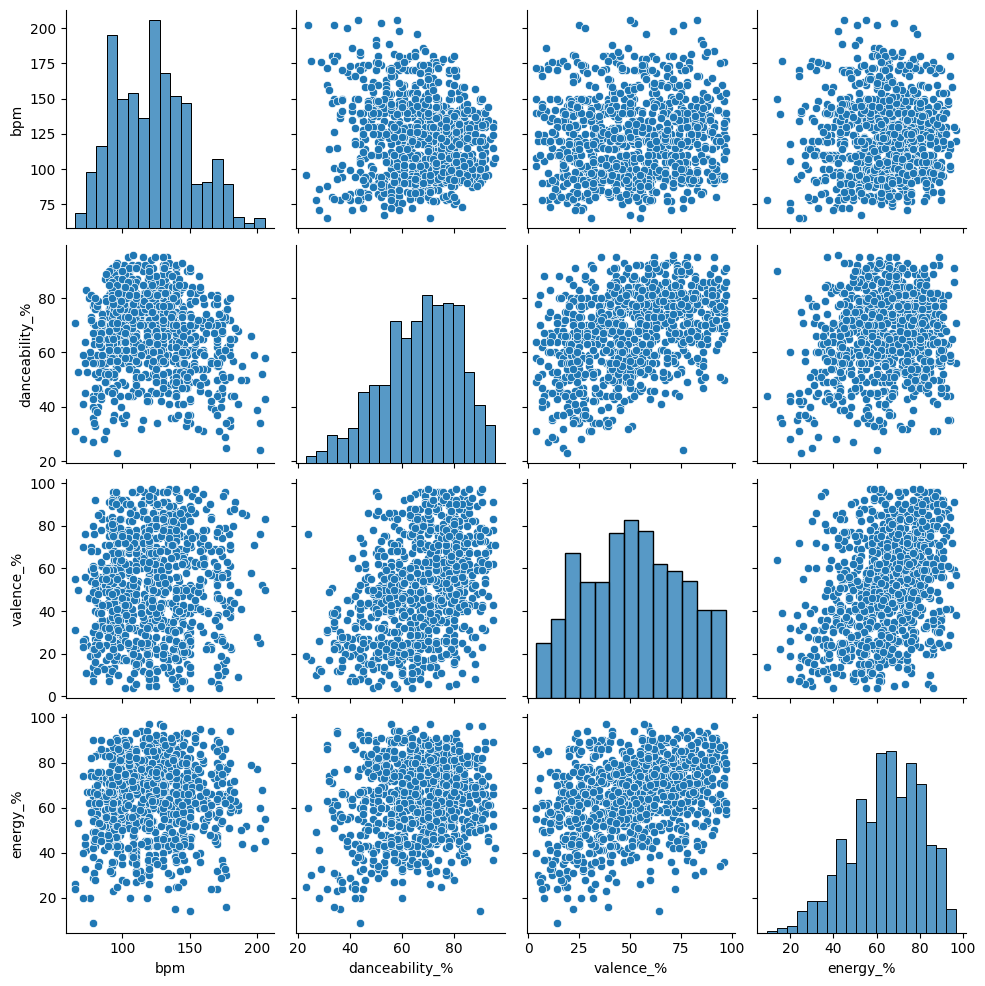

In [25]:

#Add scatter plot of each factor vs streams/ to show weak corr
sns.pairplot(spotify_df[numerical_factors[:4]])

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


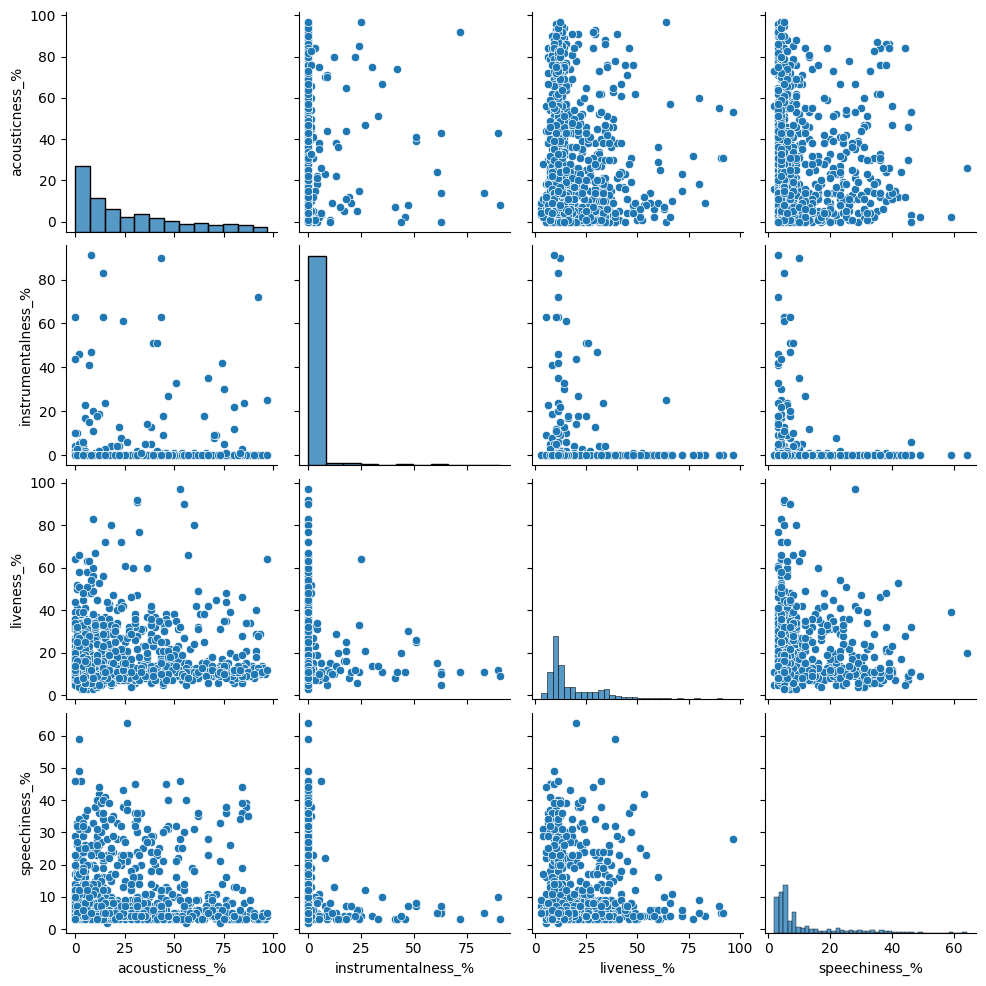

In [26]:
sns.pairplot(spotify_df[numerical_factors[4:]])

### How Are Streams Distributed per key?

In [27]:
keys_factors = ["streams","bpm","danceability_%","valence_%","energy_%","acousticness_%","instrumentalness_%","liveness_%","speechiness_%", "key"]
spotify_df_keys = spotify_df[keys_factors]

#avg value of numerical factors per key
group_spotify_df_keys = spotify_df_keys.groupby('key').mean().sort_values(by = 'streams', ascending = False)
group_spotify_df_keys

,streams,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
key,,,,,,,,,
C#,6.042802e+08,122.341667,68.641667,49.791667,66.550000,21.066667,1.241667,18.241667,12.066667
E,5.774972e+08,121.935484,65.032258,40.951613,62.112903,31.645161,2.354839,18.951613,9.032258
D#,5.530365e+08,123.393939,64.545455,46.666667,62.848485,29.090909,2.909091,17.363636,11.151515
A#,5.524754e+08,119.719298,68.789474,52.596491,62.789474,26.508772,0.298246,15.526316,11.912281
D,5.295256e+08,123.802469,67.802469,49.913580,63.530864,27.876543,1.395062,18.666667,9.320988
F#,5.223632e+08,125.479452,68.232877,59.863014,66.726027,30.369863,0.534247,18.753425,10.438356
B,5.193480e+08,121.543210,69.493827,53.592593,68.000000,24.049383,1.197531,18.098765,10.419753
G#,4.769119e+08,123.021978,66.373626,52.461538,64.065934,24.153846,1.780220,19.384615,11.978022
F,4.684464e+08,120.235955,67.101124,52.943820,64.382022,28.426966,2.595506,18.089888,9.764045


/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Streams Distribution per Key')

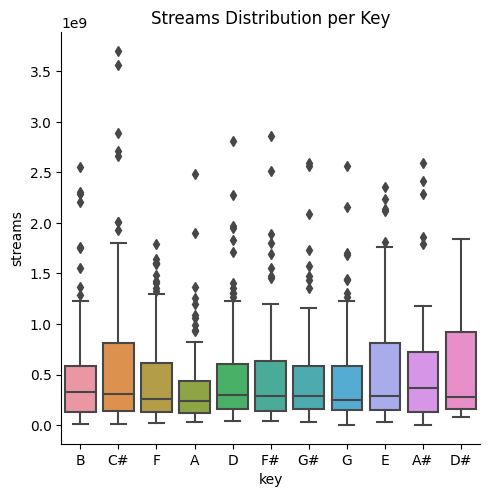

In [28]:
sns.catplot(data= spotify_df_keys, x= 'key', y = 'streams', kind = 'box')
plt.title('Streams Distribution per Key')

* Key 'C#' has the largest average number of streams, however we can also see that the outliers contribute to the larger average and does not represent the entire population.

['C#-0.12%', 'E-0.12%', 'D#-0.11%', 'A#-0.11%', 'D-0.11%', 'F#-0.11%', 'B-0.11%', 'G#-0.1%', 'F-0.1%', 'G-0.09%', 'A-0.08%']


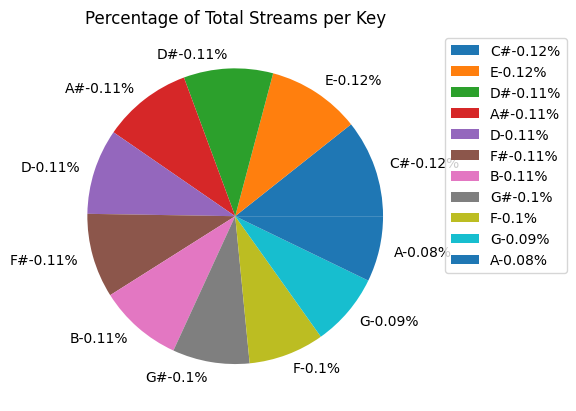

In [29]:
labels = []
for l,s in zip(group_spotify_df_keys.index,group_spotify_df_keys['streams']):
    pct = (s/spotify_df_keys['streams'].sum())*100
    pct = str(round(pct,2))+"%"
    lab = l+ "-"+ pct
    
    labels.append(lab)
    
plt.pie(group_spotify_df_keys['streams'], labels = labels)
plt.legend(loc ='best',bbox_to_anchor=(1.05, 1))
plt.title('Percentage of Total Streams per Key')

print(labels)

### Investigating Factors with Strongest Correlation Coefficients

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


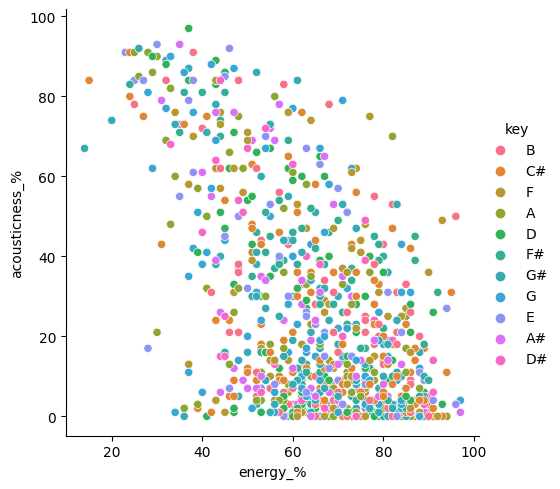

In [30]:
sns.relplot(data = spotify_df, x = spotify_df['energy_%'], y= spotify_df['acousticness_%'], hue = 'key')

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


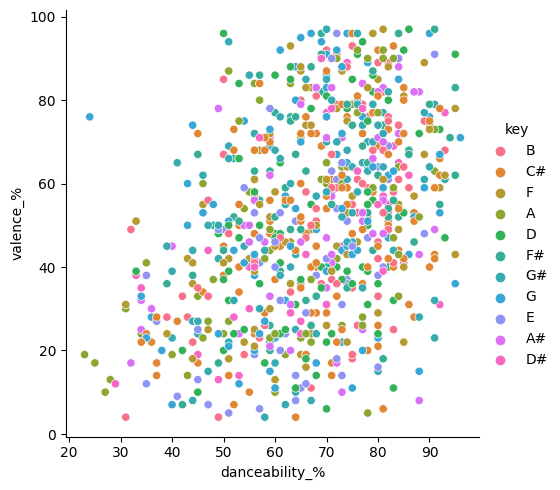

In [31]:
sns.relplot(data = spotify_df, x = spotify_df['danceability_%'], y= spotify_df['valence_%'], hue = 'key')

Enter column label to graph against streams for key categories: valence_%


/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


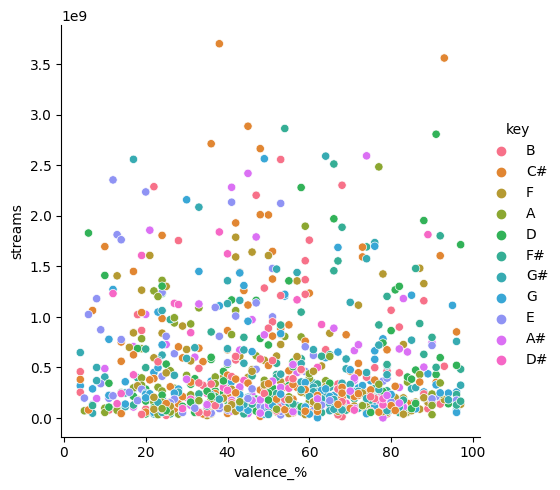

In [36]:
data =input("Enter column label to graph against streams for key categories:")

sns.relplot(data = spotify_df, x = spotify_df[data], y= spotify_df['streams'], hue = 'key')

## 5. Conclusion

This Exploratory Data Analysis allowed to gain various insights into the data and investigate factors that may contribute to most popular songs. Understanding the pattern of what makes a song 'popular' is essential from a marketing or song creation stand point if the goal is to garner large amounts of streams, thus listeners and potential album purchasers. 
It is important to note, however that there are various factors that could play a part into a song's popularity such as genre, country or geographical location, or season (Winter, Spring, Summer or Fall).
Including more predictors would require a larger dataset which may enable to build prediction or classification models to perform tasks such as recognizing a song from its features or classifying the song in the appropriate genre category based on musical keys or mode. There is a vast array of possibilities in how this data could be used to make data driven business decisions for artists and their team, or simply to streamline organization of new songs in a user's library.